Importing the necessary libraries

data source: Dataamp

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix

Loading the Dataset

In [65]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


Exploring the dataset

In [66]:
crops.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [67]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [68]:
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [69]:
crops.columns

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

In [70]:
crops['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

dealing with outliers

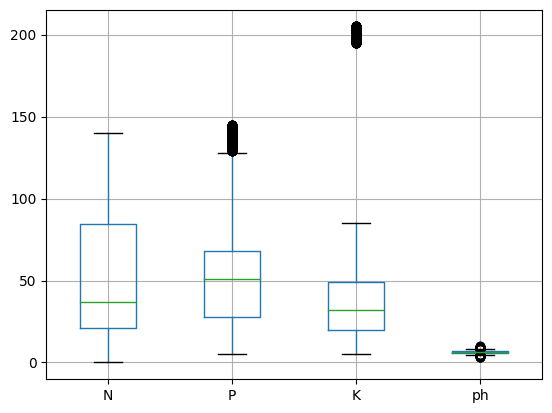

In [71]:
crops.boxplot()
plt.show()

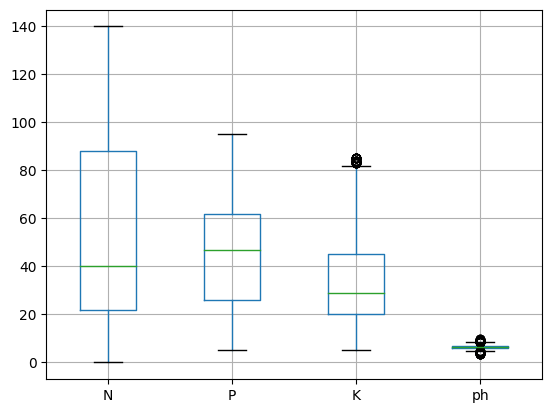

In [72]:
crops=crops[(crops['K']<150)]
crops.boxplot()
plt.show()

Features correlation

<ipython-input-73-dd3b239677e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=crops.corr()


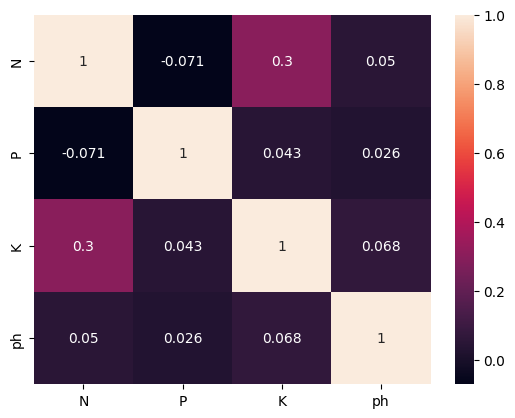

In [73]:
corr=crops.corr()
sns.heatmap(corr,annot=True)
features=['N','P','K','ph']

Spliting the data

In [74]:
X=crops[features]
y=crops[['crop']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

fitting the model

In [75]:
model=LogisticRegression(max_iter=2000,multi_class='multinomial')
model.fit(X_train[features],y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, multi_class='multinomial')

Evaluating the model performance

In [76]:
y_pred=model.predict(X_test)
f1=f1_score(y_test,y_pred,average="weighted")
print("F1 score is",f1)

F1 score is 0.7019281530463714


In [80]:
model.score(X_test,y_test)

0.705